<h1>Case study 2 Apply Machine learning algorithm on HR Analytics data from Kaggle Data Repository.</h1>

### HR - Attrition Analytics -  Exploratory Analysis & Predictive Modeling
> Human Resources are critical resources of any organiazation. Organizations spend huge amount of time and money to hire <br>
> and nuture their employees. It is a huge loss for companies if employees leave, especially the key resources.  <br>
> So if HR can predict weather employees are at risk for leaving the company, it will allow them to identify the attrition  <br>
> risks and help understand and provie necessary support to retain those employees or do preventive hiring to minimize the  <br>
> impact to the orgranization.

In [1]:
import pandas as pd
import numpy as np

In [43]:
# Load the data
hr_df = pd.read_csv( 'HR_comma_sep.csv' )

In [44]:
hr_df.columns

Index([u'satisfaction_level', u'last_evaluation', u'number_project',
       u'average_montly_hours', u'time_spend_company', u'Work_accident',
       u'left', u'promotion_last_5years', u'department', u'salary'],
      dtype='object')

In [12]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [13]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
#missings
hr_df.isnull().any().sum()

0

In [7]:
hr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


The summary statistics for Work_accident, left and promotion_last_5years does not make sense, as they are categorical variables

### EXPLORATORY ANALYSIS

In [8]:
# 0. How many records of people leaving the company exist in the dataset?
hr_left_df = pd.DataFrame( hr_df.left.value_counts() )
hr_left_df

,left
0,11428
1,3571


In [9]:
#1. What is the percentage of churn by salary bucket

In [10]:
salary_count = hr_df[['salary', 'left']].groupby(['salary', 'left']).size().reset_index()
salary_count.columns = ['salary', 'left', 'count']

In [11]:
salary_count

,salary,left,count
0,high,0,1155
1,high,1,82
2,low,0,5144
3,low,1,2172
4,medium,0,5129
5,medium,1,1317


In [12]:
salary_count = hr_df[['salary', 'left']].groupby(['salary', 'left']).size()
salary_percent = salary_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()

In [13]:
salary_percent

,salary,left,0
0,high,0,0.933711
1,high,1,0.066289
2,low,0,0.703116
3,low,1,0.296884
4,medium,0,0.795687
5,medium,1,0.204313


In [14]:
import matplotlib as plt
import seaborn as sn
%matplotlib inline

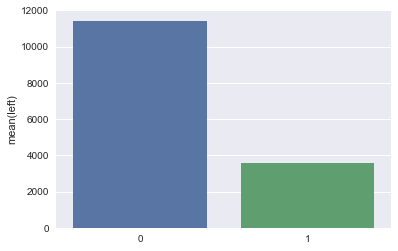

In [15]:
sn.barplot( hr_left_df.index, hr_left_df.left )

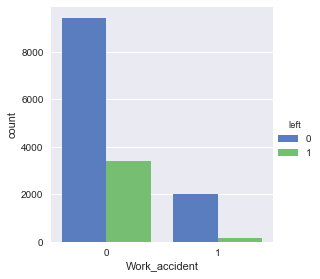

In [16]:
# 2. How many people, who had work accidents, actually left the company?
work_accident_count = hr_df[['Work_accident', 'left']].groupby(['Work_accident', 'left']).size().reset_index()
work_accident_count.columns = ['Work_accident', 'left', 'count']

sn.factorplot(x="Work_accident", y = 'count', hue="left", data=work_accident_count,
               size=4, kind="bar", palette="muted")


In [17]:
work_accident_count = hr_df[['Work_accident', 'left']].groupby(['Work_accident', 'left']).size()
work_accident_percent = work_accident_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()

In [18]:
work_accident_percent.columns = ['Work_accident', 'left', 'percent']

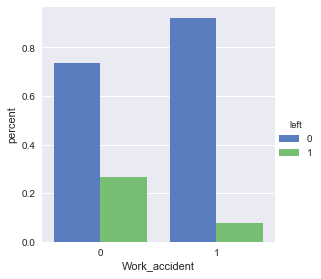

In [19]:
sn.factorplot(x="Work_accident", y = 'percent', hue="left", data=work_accident_percent,
               size=4, kind="bar", palette="muted")

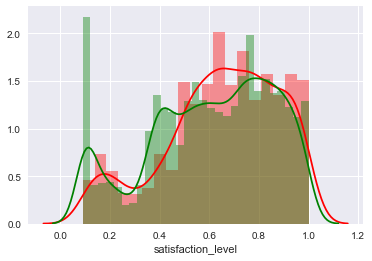

In [20]:
#3. How work accidents have impacted the statisfactin level of the empolyees?
sn.distplot( hr_df[hr_df.Work_accident == 1]['satisfaction_level'], color = 'r')
sn.distplot( hr_df[hr_df.Work_accident == 0]['satisfaction_level'], color = 'g')

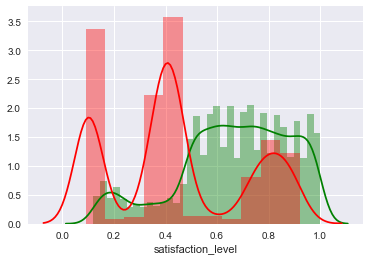

In [21]:
#4. How satisfaction levels influence whether to stay or leave the company?
sn.distplot( hr_df[hr_df.left == 0]['satisfaction_level'], color = 'g')
sn.distplot( hr_df[hr_df.left == 1]['satisfaction_level'], color = 'r')

It can be noted, large number of people who had lower satisfaction levels, have left the company. 
Especially, people who have satisfaction level less than 0.5. This makes sense. But there is also a surge in 
at higher level of satisfaction. Need to understand and deal with these employees with a different stategy.

In [22]:
#5. Average satisfaction levels for people who leave and stay back in the company
sl_left_mean = np.mean( hr_df[hr_df.left == 0]['satisfaction_level'] )
sl_left_mean

0.666809590479516

In [23]:
np.std( hr_df[hr_df.left == 0]['satisfaction_level'] )

0.21709425554771716

In [24]:
np.mean( hr_df[hr_df.left == 1]['satisfaction_level'] )

0.44009801176140917

In [25]:
np.std( hr_df[hr_df.left == 1]['satisfaction_level'] )

0.2638964784854295

### Hypothesis Test: Does lower satisfaction levels lead to people leaving the company
H0 : Average satisfaction level of people leaving is same as average satisfaction of people staying <br>
H1 : Average satisfaction level of people leaving is less than as average satisfaction of people staying   

In [26]:
from scipy import stats

stats.ttest_ind( hr_df[hr_df.left == 1]['satisfaction_level'], hr_df[hr_df.left == 0]['satisfaction_level'])

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)

The test establishes that the average satisfaction levels are different.

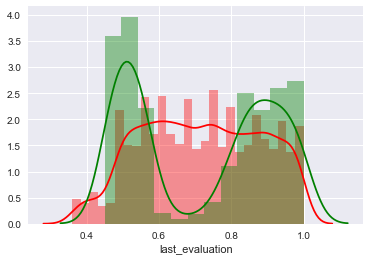

In [27]:
# 6. How last evaluation scores influencing whether to stay or leave the company?
sn.distplot( hr_df[hr_df.left == 0]['last_evaluation'], color = 'r')
sn.distplot( hr_df[hr_df.left == 1]['last_evaluation'], color = 'g')

People with low evaluation and very high evaluation are leaving, where as people with average evaluation scores are staying back. That seems interesting.

In [28]:
# 7. How time spent in company influences attrition?
time_spend_count = hr_df[['time_spend_company', 'left']].groupby(['time_spend_company', 'left']).size()
time_spend_percent = time_spend_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
time_spend_percent.columns = ['time_spend_company', 'left', 'percent']

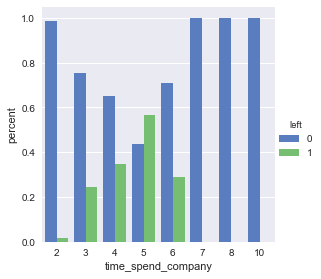

In [29]:
sn.factorplot(x="time_spend_company", y = 'percent', hue="left", data=time_spend_percent,
               size=4, kind="bar", palette="muted")

People who have spent 2 years are not leaving the company. But as experience grows people start leaving and highest after they spend 5 years in the company. But once they cross the golden years '7', they are not leaving.

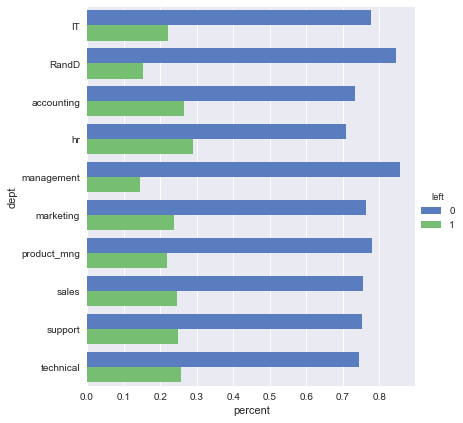

In [30]:
# 8. Which department has maximum attrition?

dept_count = hr_df[['department', 'left']].groupby(['department', 'left']).size()
dept_count_percent = dept_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
dept_count_percent.columns = ['dept', 'left', 'percent']
sn.factorplot(y="dept",
            x = 'percent',
            hue="left",
            data = dept_count_percent,
            size=6,
            kind="bar",
            palette="muted")

The percentage of people leaving the company is evenly distributed across all depts. Surprisingly, the percentage is high in HR itself. Lowest in management.

In [31]:
# 9. Effect of whether someone got promoted in last 5 years?
pd.crosstab( hr_df.promotion_last_5years, hr_df.left )

left,0,1
promotion_last_5years,,
0,11128,3552
1,300,19


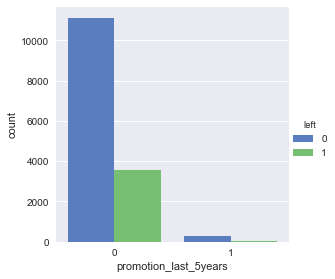

In [32]:
sn.factorplot(x="promotion_last_5years", hue = 'left', data=hr_df,
               size=4, kind="count", palette="muted")

Very few people who got promoted in last 5 years left the company, compared to people who are not promoted in last 5 years

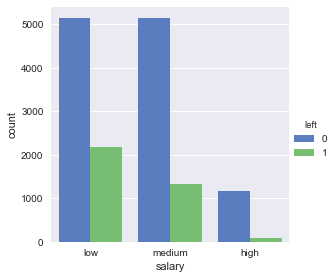

In [33]:
#10.  How Salary is influencing attrition decisions?
sn.factorplot(x="salary", hue = 'left', data=hr_df,
               size=4, kind="count", palette="muted")

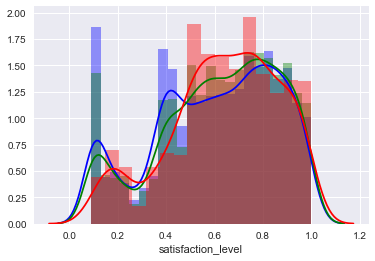

In [34]:
#11. Does higher salary lead to higher satisfaction level?
sn.distplot( hr_df[hr_df.salary == 'low']['satisfaction_level'], color = 'b')
sn.distplot( hr_df[hr_df.salary == 'medium']['satisfaction_level'], color = 'g')
sn.distplot( hr_df[hr_df.salary == 'high']['satisfaction_level'], color = 'r')

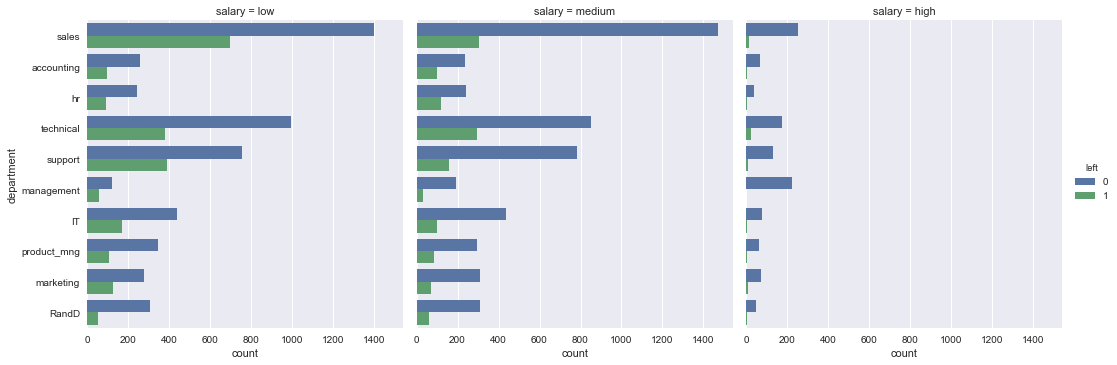

In [35]:
#12.How salaries across departments are related to attrition?
sn.factorplot( y = "department",
            col="salary",
            hue = "left",
            data=hr_df,
            kind="count",
            size=5)

No surprises. People with lowers salary have maximum percentage of exodus, while people with higher salary the exodus is least.

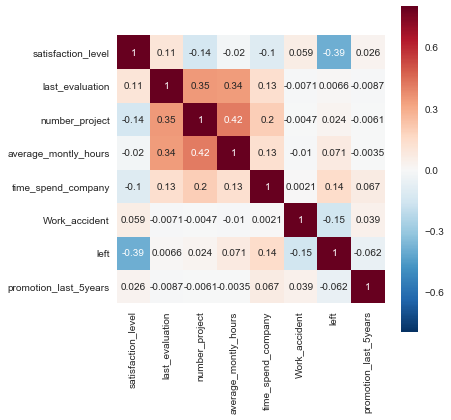

In [36]:
# 13. Lets check corrleation between Variables
corrmat = hr_df.corr()
f, ax = plt.pyplot.subplots(figsize=(6, 6))
sn.heatmap(corrmat, vmax=.8, square=True, annot=True)
plt.pyplot.show()

# Some key observations:
Satisfaction level reduces as people spend more time in the company. Also, interestingly when they work on more number of projects. <br>
Evaluation score is positively correlated with spending more montly hours and number of projects. <br>
As satisfaction level reduces, people tend to leave company <br>

### PREDICTIVE MODEL: Build a model to predict if an employee will leave the company

In [21]:
hr_df.columns

Index([u'satisfaction_level', u'last_evaluation', u'number_project',
       u'average_montly_hours', u'time_spend_company', u'Work_accident',
       u'left', u'promotion_last_5years', u'department', u'salary'],
      dtype='object')

In [4]:
# Encoding Categorical Features
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project',
     'average_montly_hours', 'time_spend_company']

categorical_features = ['Work_accident','promotion_last_5years', 'department', 'salary']

In [5]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [6]:
for c_feature in categorical_features:
  hr_df = create_dummies( hr_df, c_feature )

In [19]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,Work_accident_1,promotion_last_5years_1,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,1,0,0,0,0,0,0,0,0,1,0,0,1,0


In [7]:
#Splitting the data

feature_columns = hr_df.columns.difference( ['left'] )
feature_columns1 = feature_columns[1:5]

In [57]:
feature_columns1

Index([u'average_montly_hours', u'department', u'last_evaluation',
       u'number_project'],
      dtype='object')

In [8]:
from sklearn.cross_validation import train_test_split


train_X, test_X, train_y, test_y = train_test_split( hr_df[feature_columns],
                                                  hr_df['left'],
                                                  test_size = 0.2,
                                                  random_state = 42 )

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
# Building Models
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( train_X, train_y )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
list( zip( feature_columns, logreg.coef_[0] ) )

[('Work_accident_1', -1.4926622659264606),
 ('average_montly_hours', 0.0049756306487029637),
 ('department_RandD', -0.57076362572504025),
 ('department_accounting', 0.093003010335066735),
 ('department_hr', 0.35887704320325536),
 ('department_management', -0.36238814510653666),
 ('department_marketing', 0.13047430429744139),
 ('department_product_mng', 0.023809160127111092),
 ('department_sales', 0.075841800523843247),
 ('department_support', 0.13493942577306295),
 ('department_technical', 0.19545537758819428),
 ('last_evaluation', 0.59258573746066556),
 ('number_project', -0.30373340935550674),
 ('promotion_last_5years_1', -1.2172793589365365),
 ('salary_low', 1.8131725510337624),
 ('salary_medium', 1.3088618866113126),
 ('satisfaction_level', -4.1082675418736914),
 ('time_spend_company', 0.26529852861389602)]

In [11]:
logreg.intercept_

array([-1.53003327])

In [12]:
#Predicting the test cases
hr_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': logreg.predict( test_X ) } )

In [13]:

hr_test_pred = hr_test_pred.reset_index()

In [14]:
#Comparing the predictions with actual test data
hr_test_pred.sample( n = 10 )

,index,actual,predicted
868,4035,0,0
1951,5871,0,0
765,7865,0,0
2941,7120,0,1
1782,10237,0,0
1558,3717,0,0
1389,6345,0,0
1847,3852,0,0
1020,9123,0,0
1921,9450,0,0


In [15]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix( hr_test_pred.actual,
                            hr_test_pred.predicted, [1,0] )
cm

array([[ 225,  481],
       [ 175, 2119]])

In [16]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

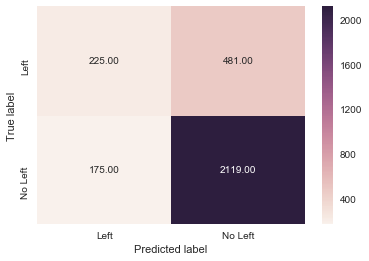

In [17]:
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"])
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [18]:
score = metrics.accuracy_score( hr_test_pred.actual, hr_test_pred.predicted )
round( float(score), 2 )

0.78

Overall test accuracy is 78%. 

The model is predicting the probability of him leaving the company is only 0.027, which is very low.

In [37]:
auc_score = metrics.roc_auc_score( hr_test_pred.actual, hr_test_pred.Left_1  )
round( float( auc_score ), 2 )

0.81